In [1]:
# Import libraries
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import os
from config import db_user, db_password, db_host, db_port

In [2]:
# Connect to the former employees database
db_name = "former_employees_db"
engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

In [3]:
# Add data from the engine to a dataframe
emp_data = pd.read_sql("SELECT * FROM emp_salary_title", engine)

# Display data from the dataframe
emp_data.head()

,emp_no,last_name,first_name,sex,salary,title
0,10001,Facello,Georgi,M,60117,Senior Engineer
1,10002,Simmel,Bezalel,F,65828,Staff
2,10003,Bamford,Parto,M,40006,Senior Engineer
3,10004,Koblick,Chirstian,M,40054,Senior Engineer
4,10005,Maliniak,Kyoichi,M,78228,Staff


In [4]:
#Print a count of records
print(len(emp_data))

300024


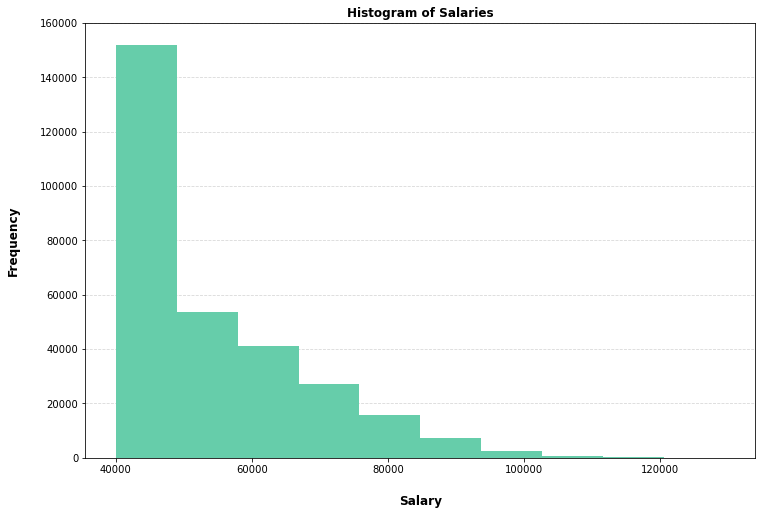

<Figure size 432x288 with 0 Axes>

In [5]:
# Plot the histogram
plt.figure(figsize=(12,8))
plt.hist(emp_data['salary'],  bins=10, color='mediumaquamarine', zorder=2, rwidth=1)
plt.grid(axis='y', linestyle='--', alpha=.5, zorder=3)
plt.title("Histogram of Salaries", weight='bold', size=12)
plt.xlabel("Salary", labelpad=20, weight='bold', size=12)
plt.ylabel("Frequency", labelpad=20, weight='bold', size=12)
plt.ylim(0, 160000)
plt.show()

outfile = os.path.join('Output', 'histogram_salaries.png')
plt.savefig(outfile)

In [7]:
#create a dataframe from the groupby
title_grouped = emp_data.groupby(['title'])

#get statistics
title_grouped_describe = title_grouped.describe()['salary']

#display the dataframe
title_grouped_describe


,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
Assistant Engineer,5835.0,48564.434447,10281.259519,40000.0,40000.00,44588.0,54671.50,99683.0
Engineer,47303.0,48535.336511,10340.663069,40000.0,40000.00,44478.0,54645.00,100683.0
Manager,24.0,51531.041667,12068.128725,40000.0,40000.00,48458.5,60358.75,72446.0
Senior Engineer,97747.0,48506.799871,10252.482143,40000.0,40000.00,44502.0,54605.00,110449.0
Senior Staff,26583.0,58550.172704,16473.869221,40000.0,41242.00,56585.0,70632.50,127238.0
Staff,107384.0,58465.382850,16499.506888,40000.0,41012.75,56407.0,70530.50,129492.0
Technique Leader,15148.0,48582.896092,10315.342481,40000.0,40000.00,44546.0,54960.25,104065.0


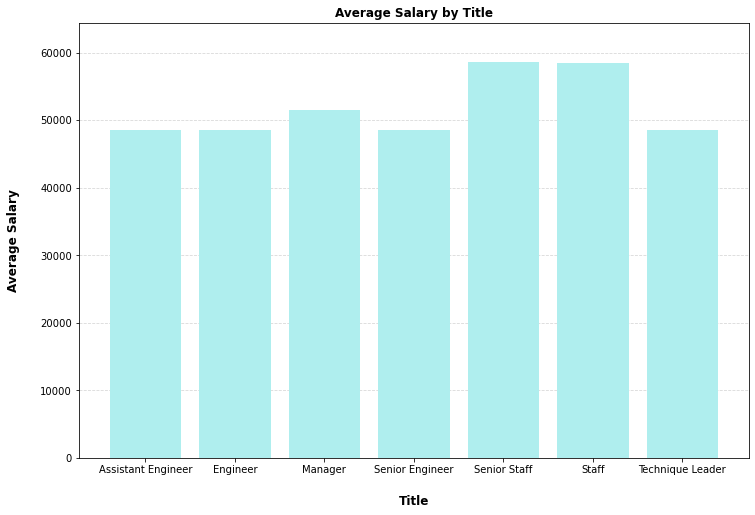

<Figure size 432x288 with 0 Axes>

In [8]:
#Plot the bar graph
plt.figure(figsize=(12,8))
plt.bar(title_grouped_describe.index, title_grouped_describe['mean'], color='paleturquoise', zorder=2)
plt.grid(axis='y', linestyle='--', alpha=.5, zorder=3)
plt.title("Average Salary by Title", weight='bold', size=12)
plt.xlabel("Title", labelpad=20, weight='bold', size=12)
plt.ylabel("Average Salary", labelpad=20, weight='bold', size=12)
plt.ylim(0, max(title_grouped_describe['mean']*1.1))
plt.show()

outfile = os.path.join('Output', 'average_salary_by_title.png')
plt.savefig(outfile)